# Procesamiento de las series

Obtención de indicadores a partir de las series temporales para la construcción del esapcio de observaciones.

# Indicadores técnicos
* Indicadores de momento: intentan capturar la tasa de cambio -> Relative strenght index (RSI), Stochastic Oscillator (SO)
* Indicadores de tendencia: capturan la dirección -> Mean Average (MA), Exponential Mean Average (EMA), Moving Average Convergence/divergence (MACD)
* Indicadores de volumen: capturan informacion acerca del volumen de transacción -> Positive indicator volume (IPVI), Indicator Negative Volume (INVI), Williams Overbought/Oversold Index, Volatility Volume Ratio (VVR), and Volume Ratio (VR)
* Indicadores de volatilidad: capturan la variación del precio -> Average True Range (ATR), Bollinguer bands



In [2]:
import pandas as pd
import gymnasium as gym
import pandas_ta as ta

import sys
import os

import matplotlib.pyplot as plt

# Añadir el directorio raíz del proyecto al PYTHONPATH
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(project_root)

In [13]:
btc_data = pd.read_parquet(r'C:\Users\adelapuente\Desktop\math_tfm\api_data\BTC_all.parquet')
spy_data = pd.read_parquet(r'C:\Users\adelapuente\Desktop\math_tfm\api_data\SPY_all.parquet')

In [14]:
btc_data['date'] = pd.to_datetime(btc_data['date'])
btc_data.set_index('date', inplace=True)

spy_data['date'] = pd.to_datetime(spy_data['date'])
spy_data.set_index('date', inplace=True)

In [19]:
# Calcula los indicadores usando la función definida previamente
df_btc_with_indicators = calculate_indicators(btc_data)
df_spy_with_indicators = calculate_indicators(spy_data)

# Guarda los DataFrames resultantes en formato Parquet
df_btc_with_indicators.to_parquet('BTC_processed.parquet')
df_spy_with_indicators.to_parquet('SPY_processed.parquet')

c:\Users\adelapuente\AppData\Local\miniconda3\envs\data_process\lib\site-packages\sklearn\utils\_array_api.py:696: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmin(X, axis=axis))
c:\Users\adelapuente\AppData\Local\miniconda3\envs\data_process\lib\site-packages\sklearn\utils\_array_api.py:713: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmax(X, axis=axis))
C:\Users\adelapuente\AppData\Local\Temp\ipykernel_10444\1261651611.py:68: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)
c:\Users\adelapuente\AppData\Local\miniconda3\envs\data_process\lib\site-packages\sklearn\utils\_array_api.py:696: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmin(X, axis=axis))
c:\Users\adelapuente\AppData\Local\miniconda3\envs\data_process\lib\site-packages\sklearn\utils\_array_api.py:713: RuntimeWarning: 

In [24]:
df_spy_with_indicators.columns

Index(['open', 'high', 'low', 'close', 'volume', 'log_returns', 'volatility',
       'SMA_20', 'SMA_50', 'RSI', 'MACD', 'MACD_Signal', 'MACD_Diff', 'ATR',
       'VWAP', 'PVI', 'NVI', 'CCI', 'OBV', 'Hurst'],
      dtype='object')

In [32]:
# Renombrar las columnas adecuadas con el prefijo "feature_"
# esto es necesario porque son las que va a devolver el entorno como observaciones
columns_to_rename = [col for col in data.columns if col not in ['date', 'open', 'close', 'high', 'low']]
data.rename(columns={col: 'feature_' + col for col in columns_to_rename}, inplace=True)

In [33]:
# Normalizar las columnas con el prefijo "feature_" usando scale
for col in data.columns:
    if col.startswith('feature_'):
        data[col] = scale(data[col])

In [34]:
data.dropna(inplace=True)

In [35]:
# # Registro del entorno personalizado
# gym.envs.registration.register(
#     id='TradingEnv-v0',
#     entry_point='my_envII.trading_env2_alex:TradingEnv',
# )

# Ahora intenta crear el entorno
env = gym.make(
    "TradingEnv-v0",
    name="BTCUSD",
    df=data,
    windows=5,
    positions=[-1, 0, 1],  # -1 (=SHORT), +1 (=LONG)
    initial_position=0,  # Posición inicial
    trading_fees=0.01 / 100,  # 0.01% por compra/venta de acciones
    portfolio_initial_value=10000,  # en FIAT (aquí, USD)
    max_episode_duration=500000,
)

In [36]:
observation, info = env.reset()

In [37]:
observation

array([[-0.21208736,  0.6848613 ,  0.3830476 ,  0.59981173, -0.8847313 ,
        -0.8846012 ,  0.08004049,  0.07941429,  0.05883239,  0.6300152 ,
        -0.83340365, -0.78880954, -0.8828222 , -0.8847313 , -0.88661015,
        -0.45373544,  0.92838144,  0.        ,  0.        ],
       [-0.295234  ,  0.16338143,  0.12440901,  0.31318456, -0.88469607,
        -0.8845951 ,  0.07201475,  0.04310315,  0.06245007,  0.6300152 ,
        -0.83344287, -0.787294  , -0.8827585 , -0.88469607, -0.88660336,
        -0.46211106,  0.30385482,  0.        ,  0.        ],
       [-0.10544909, -1.0533586 , -0.2936698 ,  0.07422362, -0.88470644,
        -0.8846765 ,  0.02701852, -0.0800473 ,  0.05573194,  0.6299545 ,
        -0.83344287, -0.78176963, -0.8827999 , -0.88470644, -0.88658285,
        -0.45299923, -1.3763747 ,  0.        ,  0.        ],
       [-0.10619434, -0.09370951, -0.65015507, -0.28448597, -0.88468   ,
        -0.8846854 ,  0.01963057, -0.08284274,  0.0487792 ,  0.6299545 ,
        -0.833

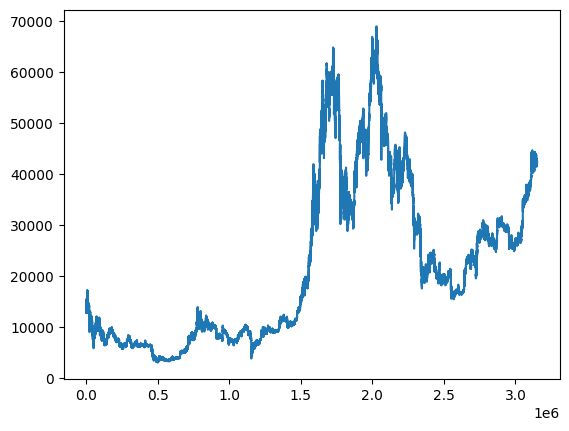

In [49]:
plt.plot(env.unwrapped._price_array)

In [58]:
env.unwrapped._features_columns

['feature_volume',
 'feature_RSI',
 'feature_STOCH_K',
 'feature_STOCH_D',
 'feature_MA',
 'feature_EMA',
 'feature_MACD',
 'feature_MACD_H',
 'feature_MACD_S',
 'feature_PVI',
 'feature_NVI',
 'feature_ATR',
 'feature_BBL_20_2.0',
 'feature_BBM_20_2.0',
 'feature_BBU_20_2.0',
 'feature_BBB_20_2.0',
 'feature_BBP_20_2.0',
 'dynamic_feature__0',
 'dynamic_feature__1']

In [57]:
len(env.unwrapped._features_columns), observation.shape

(19, (5, 19))

In [ ]:
env.unwrapped.dynamic_feature_functions

In [42]:
for _ in range(1000):
    action = env.action_space.sample()  # agent policy that uses the observation and info
    observation, reward, terminated, truncated, info = env.step(action)

    if terminated or truncated:
        observation, info = env.reset()

env.close()

In [44]:
observation

array([[-0.14876176, -0.84349227,  0.2369964 ,  0.69551516, -0.8848091 ,
        -0.88485557,  0.11067235, -0.12090383,  0.15880032,  0.628959  ,
        -0.83150405, -0.732026  , -0.88287246, -0.8848091 , -0.88671535,
        -0.46182683, -1.4786527 , -1.        ,  0.        ],
       [-0.2770369 ,  0.30251783, -0.00513105,  0.42598104, -0.8847713 ,
        -0.88484055,  0.10418625, -0.11323247,  0.14929701,  0.628959  ,
        -0.8313908 , -0.72378415, -0.8827826 , -0.8847713 , -0.8867295 ,
        -0.47713688,  0.14962769, -1.        ,  0.        ],
       [-0.18018639, -0.47514448, -0.59322846, -0.1254582 , -0.8847727 ,
        -0.88489294,  0.06912633, -0.17982475,  0.13420473,  0.62891287,
        -0.8313908 , -0.72212386, -0.88278836, -0.8847727 , -0.8867266 ,
        -0.4758609 , -1.2557608 , -1.        ,  0.        ],
       [-0.28672135,  0.37815425, -0.01444451, -0.21275401, -0.88476616,
        -0.88486415,  0.07407118, -0.13127387,  0.12318724,  0.62891287,
        -0.831

In [45]:
reward, terminated, truncated, info

(-0.0001802792337394418,
 False,
 False,
 {'idx': 1217837,
  'step': 1000,
  'date': 1217870,
  'position_index': 2,
  'position': 1,
  'real_position': 0.7591346587121381,
  'data_close': 7564.32,
  'data_low': 7548.5,
  'data_open': 7551.84,
  'data_date': Timestamp('2020-04-25 20:50:00'),
  'data_high': 7568.0,
  'portfolio_valuation': 9964.398164658649,
  'portfolio_distribution_asset': 1,
  'portfolio_distribution_cash': 2400.0781646586493,
  'reward': -0.0001802792337394418,
  'strategy_returns': -7.591021676014221e-05})

In [61]:
data.to_parquet(r'..\data\PROCESSED_BTC_1min_2018-01-01_to_2023-12-31.parquet')